In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.style.use('seaborn-colorblind')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from acquire import get_iris_data
from prepare import prep_iris

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = get_iris_data()
df.drop(columns={'species_id', 'measurement_id'}, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. Split data into train (70%) & test (30%) samples.

In [14]:
train, test = train_test_split(df, train_size=.7, random_state=123)
train.shape, test.shape

((105, 5), (45, 5))

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
>Takeaways:
    - petal length and petal width are the best variables for differentiation
    - setosa is easier to differentiate than virginica and versicolor

In [30]:
melt = train.melt(id_vars='species_name')
melt = melt.rename(columns={'variable':'flower_part', 'value':'length'})

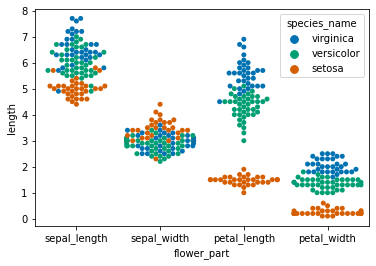

In [33]:
sns.swarmplot(x='flower_part', y='length', hue='species_name', data=melt)

3. Create 4 subplots (2 rows x 2 columns) of scatterplots



- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

> Takeaways:
    - sepal area and petal area are pretty good predictors
    - petal length and petal width are still better predictors

In [69]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
114,5.8,2.8,5.1,2.4,virginica,16.24,12.24


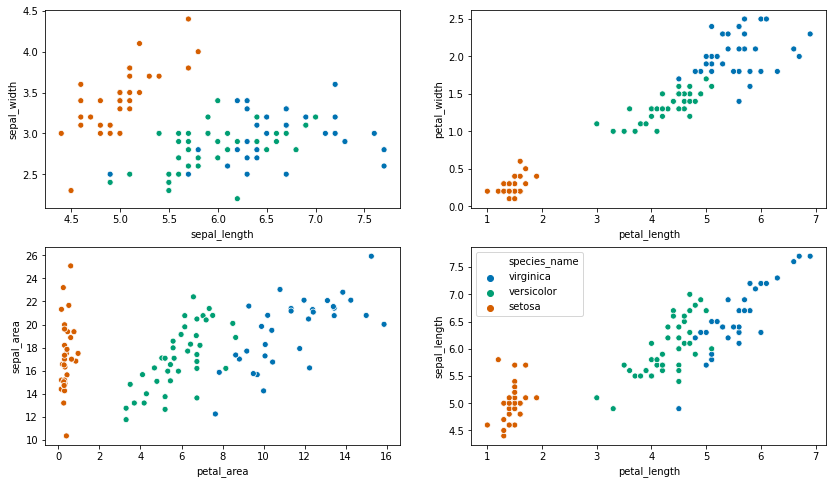

In [70]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species_name", legend=False)

plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species_name", legend=False)

plt.subplot(2, 2, 3)
sns.scatterplot(x="petal_area", y="sepal_area", data=train, hue="species_name", legend=False)

plt.subplot(2, 2, 4)
sns.scatterplot(x="petal_length", y="sepal_length", data=train, hue="species_name")

4. Create a heatmap of each variable layering correlation coefficient on top.

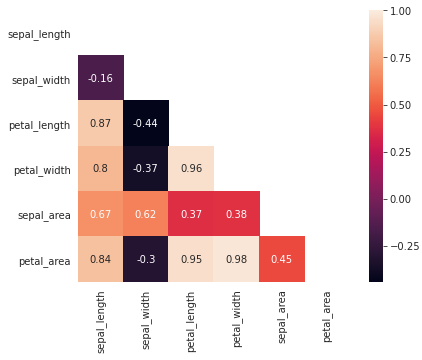

In [82]:

corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True)

5. Create a scatter matrix visualizing the interaction of each variable

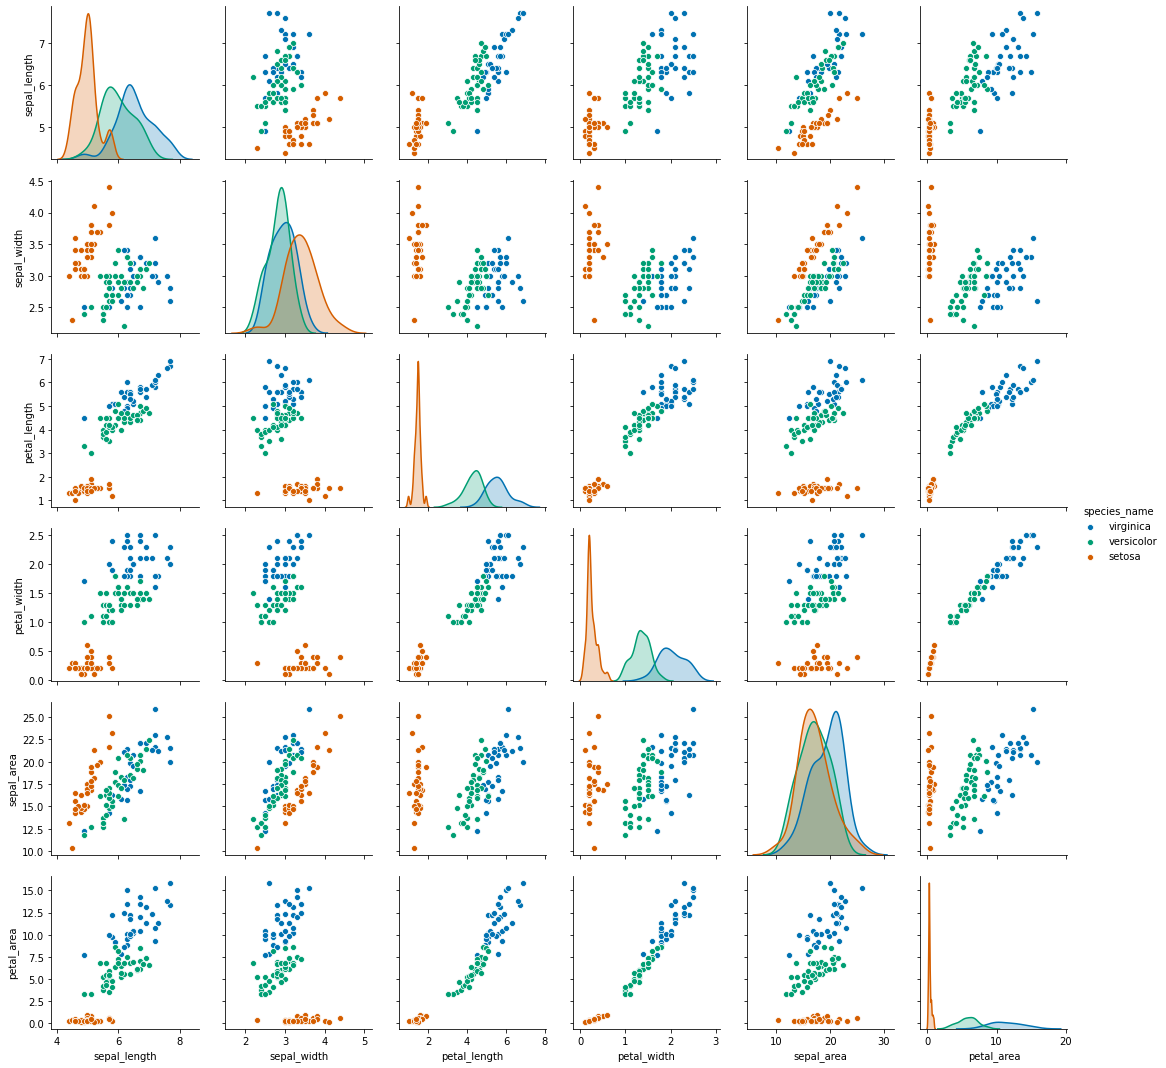

In [92]:
sns.pairplot(train, hue='species_name')

6. Is the sepal length significantly different in virginica compared to versicolor?
    Run an experiment to test this.must include null hypothesis, alternative hypothesis, t-test, results, summary H0: the difference in sepal length between virginica and versicolor is insignificant.  Ha: the difference in sepal length between virginica and versicolor is substantial.



- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed.

- H_0:  There is no difference in sepal length between Virginica and Versicolor
- H_A:  There is a statistically significant difference between Virginica and Versicolor

In [98]:

virginica = train[train.species_name == "virginica"]
versicolor = train[train.species_name == "versicolor"]

t, p = scipy.stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

# Let's go with an alpha of .01 for a 99% confidence level
alpha = .01


if p < alpha:
    print(f"p: {p} We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.")

p:6.811720108343317e-05 We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.
